<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد.
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
%matplotlib inline
import tensorflow as tf

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


In [4]:
animals= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'horse')

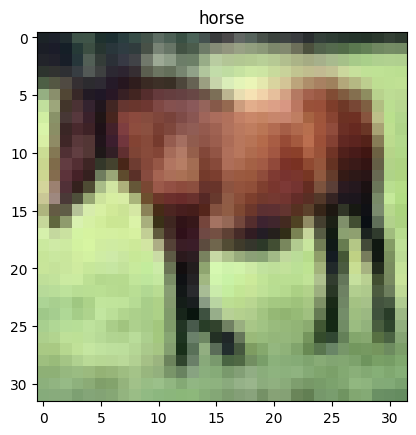

In [5]:
plt.imshow(x_train[7])
plt.title (animals[y_train[7][0]])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [6]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [9]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [26]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [27]:
y_train[0:10]

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    

</ul>
</div>


In [47]:

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))




# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [21]:
def cnn_model():

    model = Sequential()

    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(x_train)

In [24]:
from tensorflow.keras.optimizers import  Adam

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0003),
             metrics=['accuracy'])

NameError: ignored

In [1]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 64),
                    steps_per_epoch = len(x_train) // 64,
                    epochs = 125,
                    validation_data= (x_test, y_test),
                    verbose=1)

NameError: ignored

In [48]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001)



# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید.
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [49]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt_rms,
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(x_train, y_train, epochs=200, batch_size=128,validation_data=(x_test,y_test))

Epoch 1/200
391/391 [==============================] - 5s 9ms/step - loss: 1.9925 - accuracy: 0.2661 - val_loss: 1.6598 - val_accuracy: 0.4010
Epoch 2/200
391/391 [==============================] - 3s 6ms/step - loss: 1.6722 - accuracy: 0.3978 - val_loss: 1.4439 - val_accuracy: 0.4888
Epoch 3/200
391/391 [==============================] - 2s 6ms/step - loss: 1.5207 - accuracy: 0.4539 - val_loss: 1.4254 - val_accuracy: 0.4821
Epoch 4/200
391/391 [==============================] - 2s 6ms/step - loss: 1.4290 - accuracy: 0.4884 - val_loss: 1.2568 - val_accuracy: 0.5599
Epoch 5/200
391/391 [==============================] - 2s 6ms/step - loss: 1.3503 - accuracy: 0.5189 - val_loss: 1.1988 - val_accuracy: 0.5668
Epoch 6/200
391/391 [==============================] - 2s 6ms/step - loss: 1.2862 - accuracy: 0.5456 - val_loss: 1.1841 - val_accuracy: 0.5766
Epoch 7/200
391/391 [==============================] - 3s 7ms/step - loss: 1.2337 - accuracy: 0.5647 - val_loss: 1.1139 - val_accuracy: 0.6053

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


In [15]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.5 MB/s eta 0:00:00


In [27]:
import keras_tuner  as kt
import keras

In [29]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(32, 32,3)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [17]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='sparse_categorical_crossentropy')
  return model

In [30]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,

                     project_name='intro_to_kt')

In [31]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [42]:
x_train.shape

(50000, 32, 32, 3)

In [43]:
y_train.shape

(50000, 10)

In [46]:
x_test.shape

(10000, 32, 32, 3)

In [47]:
y_test.shape

(10000, 10)

In [45]:
x_train[0:10]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [39]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get('units'))
print (best_hps.get('learning_rate'))


Epoch 1/2


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/eng

RuntimeError: ignored

In [32]:
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 2 Complete [00h 00m 02s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 03s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
416               |352               |units
0.01              |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/eng

RuntimeError: ignored

In [18]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=3)

In [20]:
tuner.search(x_train, y_train, epochs=2,  validation_split=0.2)
best_model = tuner.get_best_models(num_trials=1)[0]


Epoch 1/2


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, i

RuntimeError: ignored

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>